In [2]:
import os
import pandas as pd

# Set the correct working directory (absolute path)
os.chdir('/home/huuthanhvy.nguyen001/kenichiLLMP/EXP')

# Verify the current working directory
print("Current Working Directory:", os.getcwd())

# Load the CSV file into a pandas DataFrame
df = pd.read_csv('EXP_Angle.csv')

# Display the first few rows of the DataFrame
df.head(10)


Current Working Directory: /home/huuthanhvy.nguyen001/kenichiLLMP/EXP


,Unnamed: 0,Model,Run,Raw Answers,Parsed Answers,Label,Mean,MSE,MLAE,Times,Forced Repetitions,gt
0,0,gpt4o,run_0,90,[90.0],83,90.0,49.0,9.451469,10569.677114,0,67
1,1,gpt4o,run_0,45,[45.0],83,45.0,1296.0,11.813831,5880.726337,0,67
2,2,gpt4o,run_0,135,[135.0],83,135.0,2025.0,12.135749,6660.534859,0,67
3,3,gpt4o,run_0,45,[45.0],83,45.0,0.0,-3.000000,8190.005779,0,67
4,4,gpt4o,run_0,45,[45.0],83,45.0,36.0,9.229119,6700.856924,0,67
5,5,gpt4o,run_0,45,[45.0],81,45.0,400.0,10.965874,6390.800714,0,67
6,6,gpt4o,run_0,45,[45.0],81,45.0,361.0,10.891879,5950.758934,0,67
7,7,gpt4o,run_0,45,[45.0],81,45.0,529.0,11.167497,6625.259161,0,67
8,8,gpt4o,run_0,90,[90.0],81,90.0,49.0,9.451469,6746.975422,0,67
9,9,gpt4o,run_0,90,[90.0],81,90.0,576.0,11.228894,6998.932838,0,67


In [14]:
# Group the data by 'Model' and calculate the average MLAE
model_avg_mlae = df.groupby('Model')['MLAE'].mean().reset_index()

# Display the result
print(model_avg_mlae)


             Model       MLAE
0      CustomLLaMA  10.811473
1   Gemini1_5Flash  11.731260
2  GeminiProVision  11.307005
3            LLaMA  10.595948
4            gpt4o  10.504101


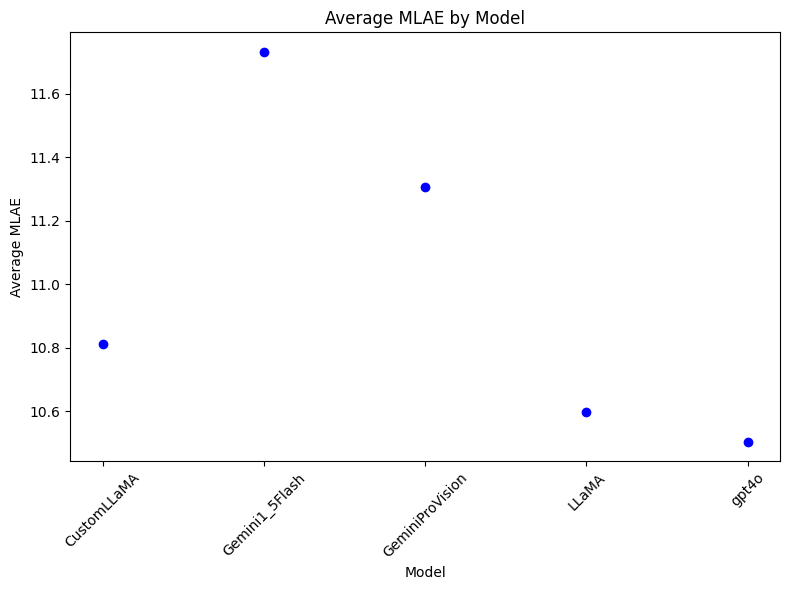

In [16]:
import matplotlib.pyplot as plt


# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(model_avg_mlae['Model'], model_avg_mlae['MLAE'], color='b', marker='o')

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Average MLAE')
plt.title('Average MLAE by Model')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


In [7]:
# Group by model and calculate standard deviation
std_results = df.groupby('Model')['MLAE'].std().reset_index()

# Rename the columns for clarity
std_results.columns = ['Model', 'std']

std_results 

,Model,std
0,CustomLLaMA,1.727221
1,Gemini1_5Flash,2.219074
2,GeminiProVision,2.309044
3,LLaMA,2.526424
4,gpt4o,2.266371


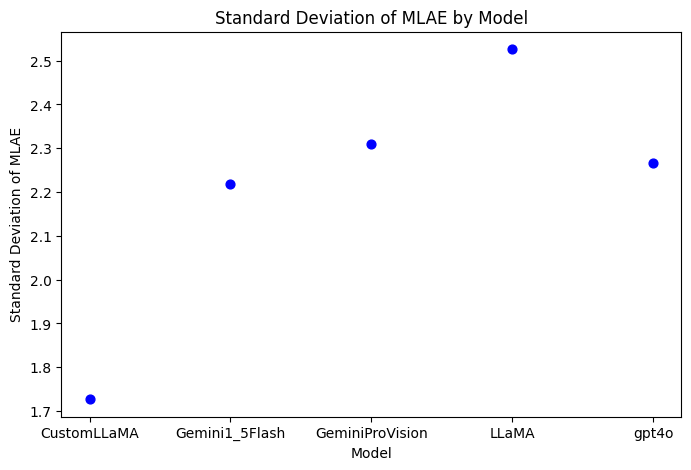

In [10]:
import matplotlib.pyplot as plt

# Create the scatter plot
plt.figure(figsize=(8, 5))  # Set the size of the plot
plt.scatter(std_results['Model'], std_results['std'], color='blue', s=40)

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Standard Deviation of MLAE')
plt.title('Standard Deviation of MLAE by Model')

# Show the plot
plt.show()